In [16]:
import pandas as pd

df = pd.read_csv(
    "bloomingdale-data.xls",
    sep="\t",
    engine="python"  # more tolerant of weird formatting
)

print(df.head())
print(df.columns)


         MLS # Status Street Number Compass Point Street Name Street Suffix  \
0  ="12346929"   CLSD           288           NaN    Old Gary           AVE   
1  ="12468059"   CLSD           126           NaN    Rosedale            CT   
2  ="12414099"   CLSD           158             S     Prairie           AVE   
3  ="12331485"   CLSD           130           NaN         3rd            ST   
4  ="12465501"   CLSD           117           NaN      Oneida            CT   

     Area  Search Price  # Rooms Bedrooms - All Levels  Total Full/Half Baths  \
0  ="108"        285000        8                     4                    1.1   
1  ="108"        315000        7                     3                    2.0   
2  ="108"        320000        7                     3                    2.0   
3  ="108"        335000        6                     2                    1.0   
4  ="108"        340000        5                     2                    2.0   

  Type Detached  
0     1.5 Story  
1 

In [17]:
import pandas as pd

# Rename columns to be easier to work with
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("#", "Num")
)

# Convert numeric columns
numeric_cols = [
    "Search_Price",
    "Num_Rooms",
    "Bedrooms_-_All_Levels",
    "Total_Full_Half_Baths"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,MLS_Num,Status,Street_Number,Compass_Point,Street_Name,Street_Suffix,Area,Search_Price,Num_Rooms,Bedrooms_-_All_Levels,Total_Full_Half_Baths,Type_Detached
0,"=""12346929""",CLSD,288,NaN,Old Gary,AVE,"=""108""",285000,8,4.0,1.1,1.5 Story
1,"=""12468059""",CLSD,126,NaN,Rosedale,CT,"=""108""",315000,7,3.0,2.0,Split Level
2,"=""12414099""",CLSD,158,S,Prairie,AVE,"=""108""",320000,7,3.0,2.0,Split Level
3,"=""12331485""",CLSD,130,NaN,3rd,ST,"=""108""",335000,6,2.0,1.0,1 Story
4,"=""12465501""",CLSD,117,NaN,Oneida,CT,"=""108""",340000,5,2.0,2.0,2 Stories


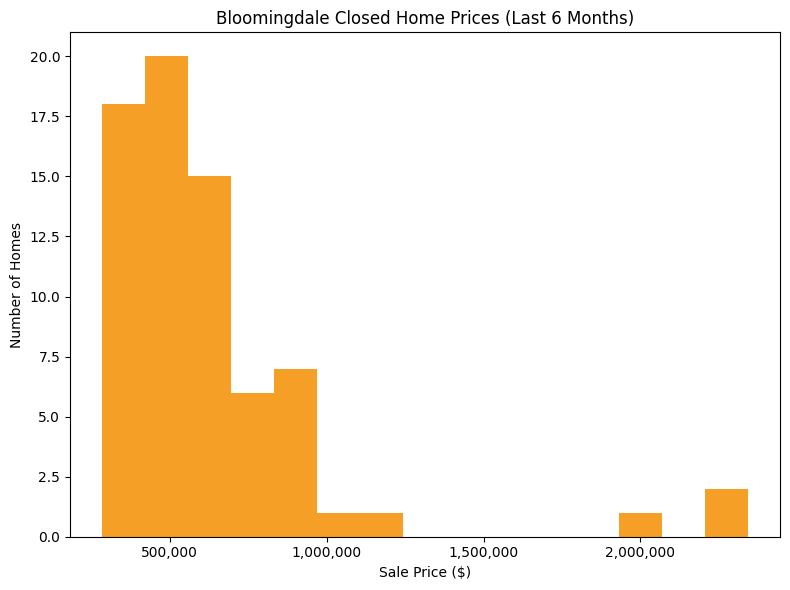

In [30]:
# Histogram - Common Sale Price
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(8, 6))

plt.hist(df["Search_Price"], bins=15, color="#F59F27")

plt.title("Bloomingdale Closed Home Prices (Last 6 Months)")
plt.xlabel("Sale Price ($)")
plt.ylabel("Number of Homes")

# Format x-axis as dollar values
plt.gca().xaxis.set_major_formatter(
    mtick.StrMethodFormatter("{x:,.0f}")
)

plt.tight_layout()
plt.show()

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.animation import FuncAnimation, FFMpegWriter

print("Working directory:", os.getcwd())

# ---- SETTINGS ----
bar_color = "#F59F27"
title = "Bloomingdale Closed Home Prices (Last 6 Months)"
bins = 10

# ---- DATA -> HISTOGRAM COUNTS ----
prices = df["Search_Price"].dropna().values
counts, edges = np.histogram(prices, bins=bins)

centers = (edges[:-1] + edges[1:]) / 2
widths = np.diff(edges) * 0.95

# ---- FIGURE (ONLY ONCE) ----
fig, ax = plt.subplots(figsize=(6, 10))

text_color = "white"

ax.set_title(
    title,
    fontsize=12,
    fontweight="bold",
    color=text_color,
    loc="center",
    pad=20
)
ax.set_xlabel("Sale Price ($)")
ax.set_ylabel("Number of Homes")

# Set Font Color White
ax.set_xlabel("Sale Price ($)", color=text_color)
ax.set_ylabel("Number of Homes", color=text_color)

ax.tick_params(axis="x", colors=text_color)
ax.tick_params(axis="y", colors=text_color)

# Dollar formatting + fewer ticks + rotation
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(mtick.MaxNLocator(5))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Bars start at 0 (we animate heights)
bars = ax.bar(centers, np.zeros_like(counts), width=widths, color=bar_color)

# Axis limits so it doesn't jump
ax.set_xlim(edges[0], edges[-1])
ax.set_ylim(0, max(counts) * 1.15)

# Median line + label (AFTER ylim is set so text places correctly)
median_price = np.median(prices)
ax.axvline(median_price, linestyle="--", linewidth=2, color="white")
ax.text(
    median_price,
    ax.get_ylim()[1] * 0.95,
    "Median",
    color="white",
    ha="center",
    va="top"
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

bg_color = "#050608"   # dark background (change to any color)

fig.patch.set_facecolor(bg_color)  # entire figure background
ax.set_facecolor(bg_color)         # plot area background

# ---- ANIMATION TIMING ----
fps = 30
total_seconds = 12

total_frames = fps * total_seconds      # 360 frames total
grow_seconds = 4                         # bars animate for 4 seconds
grow_frames = fps * grow_seconds         # 120 frames
pause_frames = total_frames - grow_frames  # 240 frames

def update(frame):
    # Grow phase
    if frame < grow_frames:
        progress = frame / (grow_frames - 1)
    else:
        progress = 1.0  # Hold phase (final chart stays)

    for bar, final_h in zip(bars, counts):
        bar.set_height(final_h * progress)
    return bars

anim = FuncAnimation(
    fig,
    update,
    frames=total_frames,
    interval=1000 / fps,   # ~33.33 ms per frame
    blit=False
)

# ---- EXPORT MP4 ----
out_file = "bloomingdale_histogram_animated_12s.mp4"
writer = FFMpegWriter(fps=fps, bitrate=1800)

anim.save(out_file, writer=writer, dpi=200)
plt.close(fig)

print("Saved:", os.path.abspath(out_file))

Working directory: /Users/danielnguyen/PycharmProjects/bloomingdale-data
Saved: /Users/danielnguyen/PycharmProjects/bloomingdale-data/bloomingdale_histogram_animated_12s.mp4


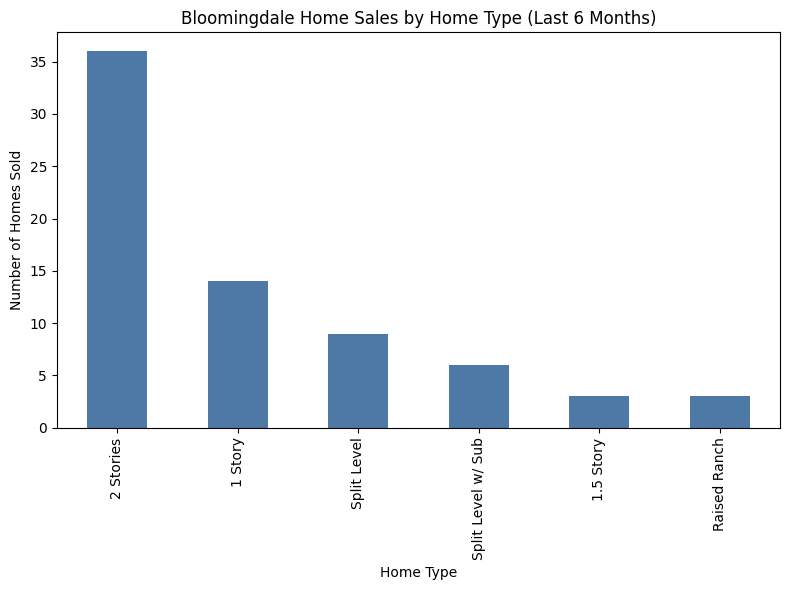

In [43]:
import matplotlib.pyplot as plt

home_type_counts = (
    df["Type_Detached"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 6))
home_type_counts.plot(kind="bar", color="#4E79A7")

plt.title("Bloomingdale Home Sales by Home Type (Last 6 Months)")
plt.xlabel("Home Type")
plt.ylabel("Number of Homes Sold")

plt.tight_layout()
plt.show()

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

print("Working directory:", os.getcwd())

# ---- STYLE SETTINGS ----
bar_color = "#F59F27"
bg_color = "#050608"
text_color = "white"

title = "Bloomingdale Home Sales by Type (Last 6 Months)"
xlabel = "Home Type"
ylabel = "Number of Homes Sold"

# ---- DATA ----
type_col = "Type_Detached"
type_counts = (
    df[type_col]
    .dropna()
    .astype(str)
    .value_counts()
    .sort_values(ascending=False)
)

labels = type_counts.index.tolist()
counts = type_counts.values.astype(float)

# ---- FIGURE ----
fig, ax = plt.subplots(figsize=(6, 10))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.set_title(title, fontsize=12, fontweight="bold", color=text_color, loc="center", pad=20)
ax.set_xlabel(xlabel, color=text_color)
ax.set_ylabel(ylabel, color=text_color)

ax.tick_params(axis="x", colors=text_color)
ax.tick_params(axis="y", colors=text_color)

# Bars start at 0
x = np.arange(len(labels))
bars = ax.bar(x, np.zeros_like(counts), color=bar_color)

# X labels
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right", color=text_color)

# Y limit
ax.set_ylim(0, max(counts) * 1.2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# ---- ANIMATION TIMING ----
fps = 30
total_seconds = 12
total_frames = fps * total_seconds
grow_seconds = 4
grow_frames = fps * grow_seconds

def update(frame):
    if frame < grow_frames:
        progress = frame / (grow_frames - 1)
    else:
        progress = 1.0

    for bar, final_h in zip(bars, counts):
        bar.set_height(final_h * progress)
    return bars

anim = FuncAnimation(fig, update, frames=total_frames, interval=1000 / fps, blit=False)

# ---- EXPORT MP4 ----
out_file = "bloomingdale_home_type_animated_12s.mp4"
writer = FFMpegWriter(fps=fps, bitrate=1800)

anim.save(out_file, writer=writer, dpi=200)
plt.close(fig)

print("Saved:", os.path.abspath(out_file))

Working directory: /Users/danielnguyen/PycharmProjects/bloomingdale-data
Saved: /Users/danielnguyen/PycharmProjects/bloomingdale-data/bloomingdale_home_type_animated_12s.mp4


In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

print("Working directory:", os.getcwd())

# ---- STYLE SETTINGS ----
bar_color = "#F59F27"
bg_color = "#050608"
text_color = "white"

title = "Bloomingdale Homes Sold by Bedrooms (Last 6 Months)"
xlabel = "Bedrooms"
ylabel = "Number of Homes Sold"

# ---- DATA ----
bed_col = "Bedrooms_-_All_Levels"

beds = pd.to_numeric(df[bed_col], errors="coerce").dropna()

# Keep it clean: only realistic bedroom counts (optional but recommended)
beds = beds[(beds >= 1) & (beds <= 8)]

bed_counts = beds.value_counts().sort_index()
labels = bed_counts.index.astype(int).astype(str).tolist()
counts = bed_counts.values.astype(float)

# ---- FIGURE ----
fig, ax = plt.subplots(figsize=(6, 10))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.set_title(title, fontsize=12, fontweight="bold", color=text_color, loc="center", pad=20)
ax.set_xlabel(xlabel, color=text_color)
ax.set_ylabel(ylabel, color=text_color)

ax.tick_params(axis="x", colors=text_color)
ax.tick_params(axis="y", colors=text_color)

# Bars start at 0
x = np.arange(len(labels))
bars = ax.bar(x, np.zeros_like(counts), color=bar_color)

ax.set_xticks(x)
ax.set_xticklabels(labels, color=text_color)

ax.set_ylim(0, max(counts) * 1.2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

# ---- ANIMATION TIMING ----
fps = 30
total_seconds = 12
total_frames = fps * total_seconds
grow_seconds = 4
grow_frames = fps * grow_seconds

def update(frame):
    if frame < grow_frames:
        progress = frame / (grow_frames - 1)
    else:
        progress = 1.0

    for bar, final_h in zip(bars, counts):
        bar.set_height(final_h * progress)
    return bars

anim = FuncAnimation(fig, update, frames=total_frames, interval=1000 / fps, blit=False)

# ---- EXPORT MP4 ----
out_file = "bloomingdale_bedrooms_animated_12s.mp4"
writer = FFMpegWriter(fps=fps, bitrate=1800)

anim.save(out_file, writer=writer, dpi=200)
plt.close(fig)

print("Saved:", os.path.abspath(out_file))

Working directory: /Users/danielnguyen/PycharmProjects/bloomingdale-data
Saved: /Users/danielnguyen/PycharmProjects/bloomingdale-data/bloomingdale_bedrooms_animated_12s.mp4
